In [1]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets #newest library 
import pandas as pd 

In [2]:
import pandas as pd
#have to add headers since the raw data did not have headers
ufos = pd.read_csv("https://github.com/UIUC-iSchool-DataViz/is445_AOUAOG_fall2021/raw/master/week05/data/ufo-scrubbed-geocoded-time-standardized-00.csv",
                  names = ["date", "city", "state", "country",
                          "shape", "duration_seconds", "duration",
                          "comment", "report_date", "latitude", "longitude"],
                  parse_dates = ["date", "report_date"])

In [3]:
ufos = ufos.fillna({'country':'unknown', 'state': 'unknown', 'shape':'unknown'})
#filling NANs with unknowns 

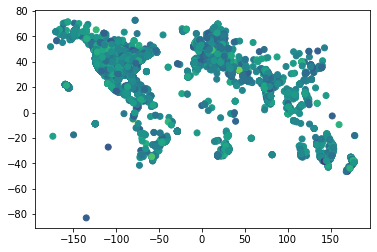

In [4]:
plt.scatter(ufos["longitude"], ufos["latitude"], c=np.log10(ufos["duration_seconds"]))
plt.show()

In [5]:
nsample = 1000
downSampleMask = np.random.choice(range(len(ufos)), nsample, replace=False)

In [6]:
ufosDS = ufos.loc[downSampleMask] #there is so much data it is easier for the program to run with a smaller sample of the data


In [7]:
column_names = ["date", "state", "country",
                "shape", "duration_seconds",
                "report_date", "latitude", "longitude"]

@ipywidgets.interact(x_axis = column_names, y_axis = column_names, cmap=plt.colormaps())
def make_plot(x_axis, y_axis, cmap):
    with plt.style.context("ggplot"):
        fig = plt.figure(figsize=(10,10))
        x = ufosDS[x_axis]
        y = ufosDS[y_axis]
        plt.scatter(x, y, c=np.log10(ufosDS["duration_seconds"]), cmap=cmap)
        plt.xlabel(x_axis.capitalize())
        plt.ylabel(y_axis.capitalize())
        
    plt.show()

interactive(children=(Dropdown(description='x_axis', options=('date', 'state', 'country', 'shape', 'duration_s…

This is the source I referred to online to assist me with creating an interactive scatter plot: https://coderzcolumn.com/tutorials/data-science/interactive-charts-using-matplotlib-and-ipywidgets. When I first ran this plot I kept getting new plots created and that is when I realized from the in class conversation and looking at the class notebook, I need to insert "with" so that it just changes one plot versus creating new versions every time I run the code. What I am wondering though, is if there is a way to do it without having to call and hardcode the style of the plot. In other words, could I have written a different with statement if I did not care about the plot style. I am assuming yes, because with different styles come different colors and requirement 2 from the homework asks us to allow the user to choose their color map. Another challenge I needed to overcome was how do I call the columns names and the data associated with them versus just calling the column names and the name of the axis changing but not the actual data in the plot changing. I noticed in the online resource it was calling the column name that the coder crated when loading the dataset. Since I did not create my own name for the columns I thought if I just call column since it is a parameter of pd.DataFrame, I should be able to retrieve my column data. I was glad to see my hunch worked. I do notice that it takes a while for the visualization to change. I am chalking that up to the fact this dataset has a lot of data. I also noticed the function does not work if one selects comment to be plotted. This is because it is a float. I would let the user select any columns other than duration, comment, and city. The reason for duration is because the format the data was inputted into this column varies a lot, creating a large amount of unique values for the axis. For example, there are entries such as 1/2 hour and 30 minute, even though these mean the same thing. Comment does not work for the scatter plot because they are all unique and the error message said it is a float. Also city has too many unique values, making it impossible to read the values on the axis since they are overlaid on top of each other. The selections I chose are the latitude for my y axis and the duration_seconds for my x axis. I chose these because I thought it would be interesting to see which hemisphere on the globe it seems these sightings tend to be longer, or even seeing where in globe the sightings are being more reported. With these selections the user can also clearly see the axis labels and points. Some other selections, such as shape, would not work on the x axis because since there are so many shapes I would have to make the x-axis longer in order for the user to clearly see all the values. 

In [8]:
column_names = ["date", "state", "country",
                "shape", "duration_seconds",
                "report_date", "latitude", "longitude"]

@ipywidgets.interact(field = column_names, bin_num = np.arange(5,20)) 
def make_hist(field, bin_num):
    with plt.style.context("ggplot"):
        fig, ax = plt.subplots(figsize=(10,10))
        if ufosDS[field].dtype != "float64" and ufosDS[field].dtype != "int64": #if not numerical data
            myseries = ufosDS.groupby(field)[field].count()
            x = myseries.index
            y = myseries.values
            ax.bar(x,y)
        else: #if numerical data
            column = field
            ufosDS.hist(column, bins=bin_num, ax=ax)
    plt.xlabel(field.capitalize())
    plt.ylabel("Count")
    fig.autofmt_xdate(rotation=90)
    plt.show()

interactive(children=(Dropdown(description='field', options=('date', 'state', 'country', 'shape', 'duration_se…

I would let the user select any columns other than duration, comment, and city. The reason for duration is because the format the data was inputted into this column varies a lot, creating a large amount of unique values for the axis. For example, there are entries such as 1/2 hour and 30 minute, even though these mean the same thing. Comment has too many unique entries and since they are sentences and not key word sentiments it would not make sense to plot it on a histogram. Also city has too many unique values, making it impossible to read the values on the axis since they are overlaid on top of each other. I support the selection of Shape to see which shape is the most common to be reported and which other follow that to perhaps determine if the shapes that are most seen are shapes that are similar to each other. I also support the selection of either longitude or latitude for a numerical value because with these values we are able to see how much the graph could change with changing the bin value.